In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import resample#resampling

from scipy.stats import zscore #normalizing the data

from sklearn.model_selection import train_test_split #Train,Test Split

from sklearn.tree import DecisionTreeClassifier #DT

from sklearn.model_selection import GridSearchCV #GridSearch

from sklearn.tree import plot_tree #Tree visualization

from sklearn.metrics import confusion_matrix #CM

from sklearn.metrics import classification_report #CR

from sklearn.metrics import accuracy_score #Score

from sklearn.ensemble import RandomForestClassifier #RF

from sklearn.ensemble import AdaBoostClassifier #AdaBoost

from sklearn.ensemble import BaggingClassifier #Bagging

from sklearn.ensemble import GradientBoostingClassifier #Gradient 

from xgboost import XGBClassifier #XGBoost


## `1. Import and warehouse data `

##### • Import all the given datasets from MYSQL server. Explore shape and size.
##### • Merge all datasets onto one and explore final shape and size.

In [2]:
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
df1.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
5556,5364-EVNIB,Male,0,No,No,13,Yes,No,Fiber optic,No


In [3]:
df1.shape

(7043, 10)

In [4]:
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
df2.sample()

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4310,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),65.6,4566.5,No


In [5]:
df2.shape

(7043, 11)

In [6]:
Main_df = pd.concat([df1,df2], axis=1)
Main_df.shape

(7043, 21)

- New columns got added.
- No change in no.of rows.
- Lets verify by calling a specific row on customerID

In [7]:
Main_df[Main_df['customerID']=='1587-FKLZB']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2282,1587-FKLZB,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.5,6822.15,Yes


In [8]:
#Just for verification importing the full dataset (which is given already)
full_df_existing = pd.read_csv("TelcomCustomer-Churn.csv")
full_df_existing [full_df_existing ['customerID']=='1587-FKLZB']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2282,1587-FKLZB,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.5,6822.15,Yes


#### Lets verify the same programatically 

In [9]:
x = Main_df[Main_df['customerID']=='1587-FKLZB']
y = full_df_existing [full_df_existing ['customerID']=='1587-FKLZB']
pd.concat([x, y]).drop_duplicates(keep=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### There is no difference between 2 rows at all. 
#### So we have merged correctly.

## `2. Data cleansing: `

#####  Missing value treatment

#####  Convert categorical attributes to continuous using relevant functional knowledge

#####  Drop attribute/s if required using relevant functional knowledge

#####  Automate all the above steps

In [10]:
#Lets copy the main df before we start making any changes
Main_backup = Main_df.copy()
Main_df.shape, Main_backup.shape

((7043, 21), (7043, 21))

In [11]:
Main_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- Tenure, Total Charges, Monthly charges are the only supposed to be numberic attributes here.
- Lets convert TOTAL CHARGES from object to float


In [12]:
Main_df['TotalCharges'] = pd.to_numeric(Main_df['TotalCharges'],errors='coerce')
Main_df['TotalCharges'].dtypes

dtype('float64')

- Lets reshape the dataframe such that all continues attributes comes first

In [13]:
Main_df = Main_df.reindex(columns=['tenure','MonthlyCharges', 'TotalCharges','customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod',  'Churn'])
Main_df.shape

(7043, 21)

In [15]:
#Verify the first 3 columns datatypes after reshaping the data
Main_df.iloc[:,:3].dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [16]:
#Verify for null values
Main_df.isna().sum()

tenure               0
MonthlyCharges       0
TotalCharges        11
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Churn                0
dtype: int64

- 11 null values in 'Total Charges'
- Its just 11 out of 7043, so we can drop those rows.

In [18]:
#No.of rows are reduced after dropping null values(rows)
Main_df = Main_df.dropna()
Main_df.shape

(7032, 21)

In [20]:
#datatypes of all attributes
Main_df.dtypes

tenure                int64
MonthlyCharges      float64
TotalCharges        float64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Churn                object
dtype: object

##### Lets drop the customerID which is insignificant for our model

In [21]:
Main_df.drop('customerID', axis=1, inplace=True)

In [22]:
#Verifying the value counts of each columns
#Excluding the first 3 (monthly charges & total charges & tenure - which are continues numbers)
for i in Main_df.iloc[:,3:].columns:
    print(Main_df[i].value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                

- Male & female count is balanced well. So model won't be baised towards any gender
- As we see, there few columns which holds YES/NO values. we can replace them using 1/0 & few has 3 classes (0/1/2)
- There are few senior citizens in dataset
- Partner/Without partner is also balanced in numbers.
- people with no dependents are more.
- very very few don't have phone service
- 'No internet Service' class has significant values in few columns
- Month-Month of Contarct are high in numbers compared to 1 or 2 years contract customers
- Most of them opt for paperless billing
- Most of them use E-check for payments

## Types of data is as followed: (Will convert all this 0,1,2..respectively) 

 - YES & NO - 'PhoneService, 'PaperlessBilling', 'Churn', 'Partner', 'Dependents'

 - MALE & FEMALE - 'gender'

 - YES & NO & NO INTERNET SERVICE - 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', treamingTV','StreamingMovies'

 - YES & NO & NO PHONE SERVICE - 'MultipleLines'

 - No & FIBER OPTIC & DSL - 'InternetService' 

### We can use 'REPLACE' method for converting these attributes into numeric.
### Since we are asked to automate this process.
### Lets use FOR LOOP & print the encoded values.

In [23]:
for i in Main_df.iloc[:,3:].columns:
    Main_df[i]=Main_df[i].astype('category')
    print(dict( enumerate(Main_df[i].cat.categories ) ))
    Main_df[i] = Main_df[i].cat.codes

{0: 'Female', 1: 'Male'}
{0: 0, 1: 1}
{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'No phone service', 2: 'Yes'}
{0: 'DSL', 1: 'Fiber optic', 2: 'No'}
{0: 'No', 1: 'No internet service', 2: 'Yes'}
{0: 'No', 1: 'No internet service', 2: 'Yes'}
{0: 'No', 1: 'No internet service', 2: 'Yes'}
{0: 'No', 1: 'No internet service', 2: 'Yes'}
{0: 'No', 1: 'No internet service', 2: 'Yes'}
{0: 'No', 1: 'No internet service', 2: 'Yes'}
{0: 'Month-to-month', 1: 'One year', 2: 'Two year'}
{0: 'No', 1: 'Yes'}
{0: 'Bank transfer (automatic)', 1: 'Credit card (automatic)', 2: 'Electronic check', 3: 'Mailed check'}
{0: 'No', 1: 'Yes'}


### Let's verify the current values count with backup dataframe
### Just to make sure, we encoded properly

###### Please note that we dropped 11 rows (holds null values-Total charges), so there is slight difference among values

In [24]:
Main_backup['Churn'].value_counts(),Main_df['Churn'].value_counts()

(No     5174
 Yes    1869
 Name: Churn, dtype: int64,
 0    5163
 1    1869
 Name: Churn, dtype: int64)

In [25]:
Main_backup['gender'].value_counts(),Main_df['gender'].value_counts()

(Male      3555
 Female    3488
 Name: gender, dtype: int64,
 1    3549
 0    3483
 Name: gender, dtype: int64)

In [26]:
Main_backup['Contract'].value_counts(),Main_df['Contract'].value_counts()

(Month-to-month    3875
 Two year          1695
 One year          1473
 Name: Contract, dtype: int64,
 0    3875
 2    1685
 1    1472
 Name: Contract, dtype: int64)

#### We have converted all the attribues to continous type

In [27]:
#verify the datatypes
Main_df.dtypes

tenure                int64
MonthlyCharges      float64
TotalCharges        float64
gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
Churn                  int8
dtype: object

## `3. Data analysis & visualisation: `

#####   Perform detailed statistical analysis on the data.
#####   Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [28]:
#Unique observations count
Main_df.nunique()

tenure                72
MonthlyCharges      1584
TotalCharges        6530
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

- Tenure, Monthly charges, Total charges are continues & the other are nominal.


In [29]:
#Statastical analysis
Main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.940557,0.948627,0.00,0.0000,1.000,2.0000,2.00
InternetService,7032.0,0.872582,0.737271,0.00,0.0000,1.000,1.0000,2.00


- No negative values present; makes sense.
- Total charges seems to have outliers
- Total charges mean is almost near to std dev, which is varied much
- Most of them are nominal classes - converted to numerical. So uniform.
- Total charges max value is way beyond compared to mean. 

In [30]:
#Distribution of continues data
Main_df.iloc[:,:3].skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

- Total charges is more right-skewed (postive). Very few people pay high charges, most of them pay moderate.
- Monthly charges is left-skewed (negative). Very few people has low charges month-wise.

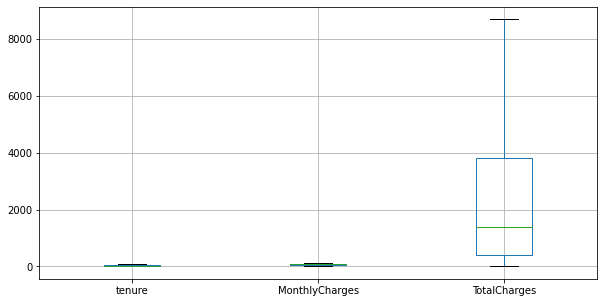

In [31]:
plt.figure(figsize=(10,5))
Main_df.iloc[:,:3].boxplot()
plt.show()

In [32]:
#Correlation among attributes
Main_df.corr()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
tenure,1.000000,0.246862,0.825880,0.005285,0.015683,0.381912,0.163386,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,-0.013779,0.219874,0.097825,-0.112343,0.248033,0.433905,-0.322173,-0.053576,0.119943,0.163984,-0.008237,0.337156,0.335761,-0.072739,0.351930,-0.192500,0.192858
TotalCharges,0.825880,0.651065,1.000000,0.000048,0.102411,0.319072,0.064653,0.113008,0.453202,-0.175691,0.254473,0.375556,0.389066,0.276890,0.392472,0.398088,0.450306,0.157830,-0.330594,-0.199484
gender,0.005285,-0.013779,0.000048,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.008545
SeniorCitizen,0.015683,0.219874,0.102411,-0.001819,1.000000,0.016957,-0.210550,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.150541
Partner,0.381912,0.097825,0.319072,-0.001379,0.016957,1.000000,0.452269,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,-0.149982
Dependents,0.163386,-0.112343,0.064653,0.010349,-0.210550,0.452269,1.000000,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.163128
PhoneService,0.007877,0.248033,0.113008,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.011691
MultipleLines,0.343673,0.433905,0.453202,-0.006908,0.146287,0.142717,-0.024975,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.038043
InternetService,-0.029835,-0.322173,-0.175691,-0.002236,-0.032160,0.000513,0.044030,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.047097


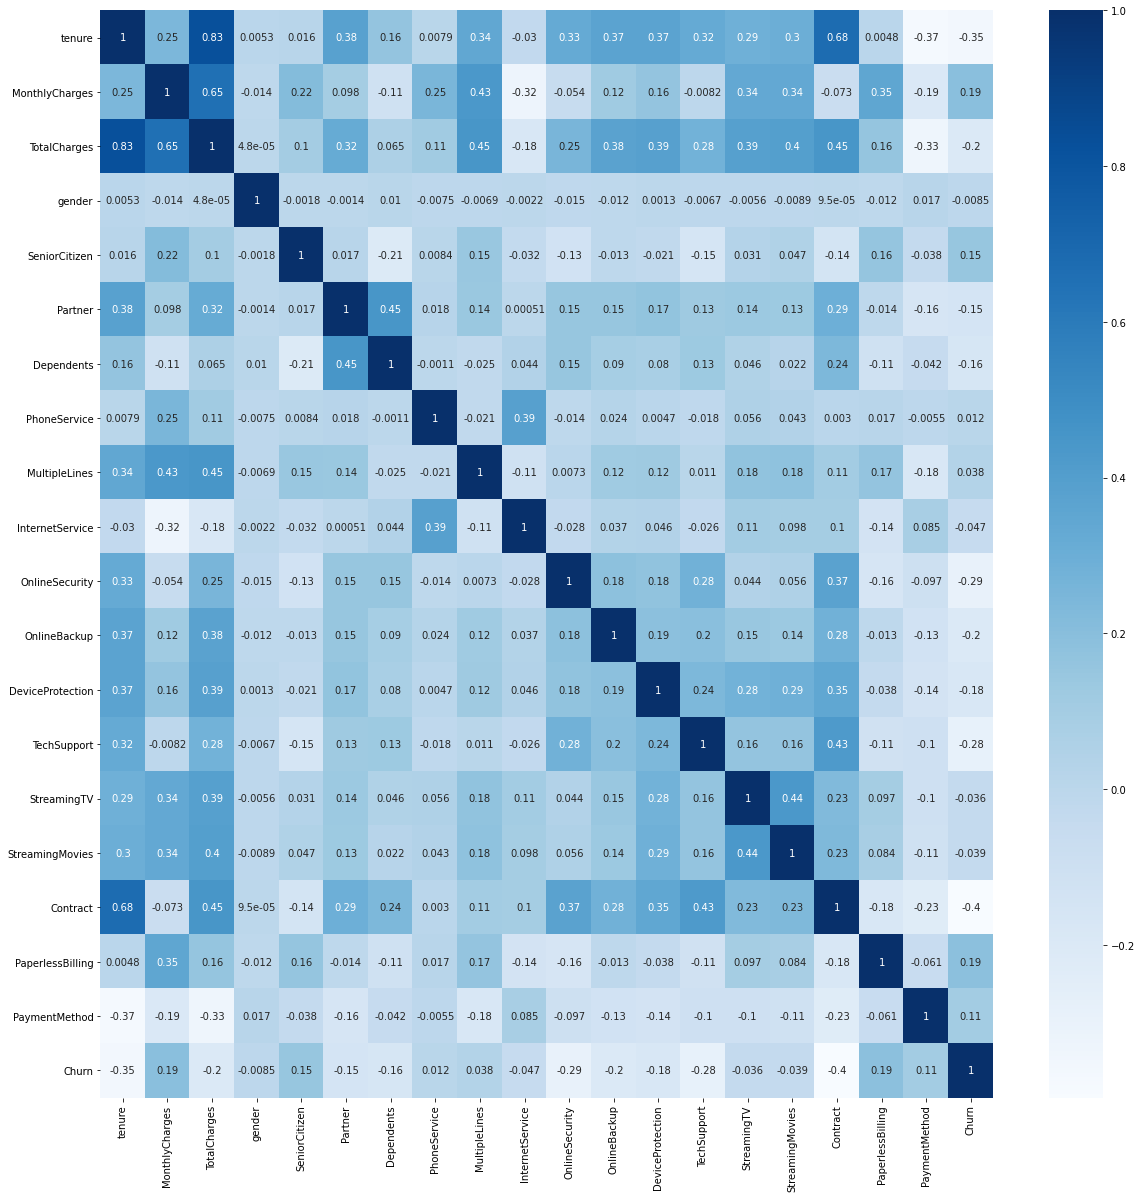

In [33]:
#plotting the correlation 
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(Main_df.corr(),ax=ax,annot=True,cmap='Blues')
plt.show()

**Churn vs other attributes:**

- Churn vs gender is almost near to zero.
- Churn has negative correlation with additional services like OnlineBackup, Security, Protection, Support, Streaming Services/Movies. Customers who availed such 
- Churn has negative relationship with tenure. i.e customer with more tenure are less likely to leave.
- Churn has slight negative correlation with Total charges




- Monthly charges, Total charges are having high postive correlatiOnlineBackup, Security, Protection, Support, Streaming Services/Movieson.
- OnlineBackup, Security, Protection, Support, Streaming Services/Movies has high positive correlation among themselves. And has negative correlation with Internet Service & Monthly Charges.



**Few other insights:**

- Tenure has good correlation with Contract,Total charges
- Internet Services vs Monthly charges has negative correlation
- Dependents vs Senior citizens has negative correlation. Mostlysenior citizens don't have dependents.
- Senior Citizens less likely to go for higher contract (negative correlation)
- gender vs almost all attributes are near 0 correlation (very slight)
- Higher contract uses more Tech support, Online security, Protection, Backup services

### `Churn vs Independent attributes Correlation visualization`

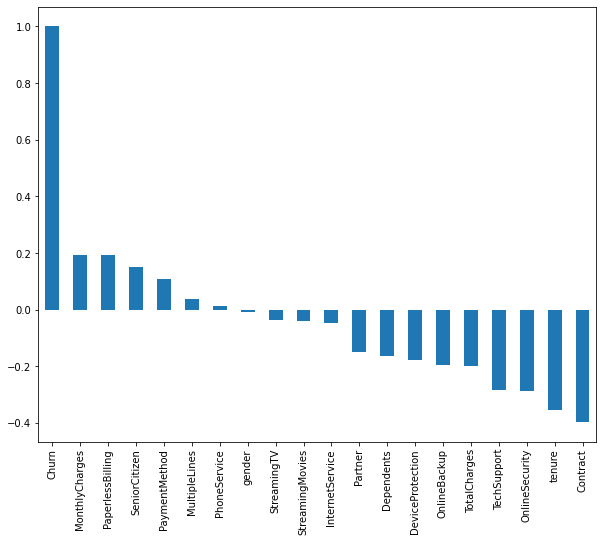

In [34]:
plt.figure(figsize=(10,8))
Main_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

- Most of them have negative correlation with Churn
- Contract & tenure and along with additional services such as OnlineSecurity, Support, Backup..etc have significant negative correlation with Churn rate


0    5163
1    1869
Name: Churn, dtype: int64


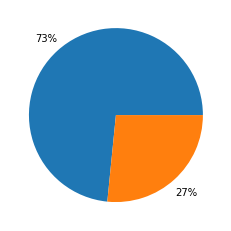

In [35]:
#Churn distribution
print(Main_df['Churn'].value_counts())

plt.pie(Main_df['Churn'].value_counts(), autopct='%1.0f%%', pctdistance=1.2)
plt.show()

- We have good no.of customers (~ 2k : 27% ) are leaving; while around ~5k (73%) is staying.

In [36]:
#Continus attributes
Main_df.iloc[:,:3].columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

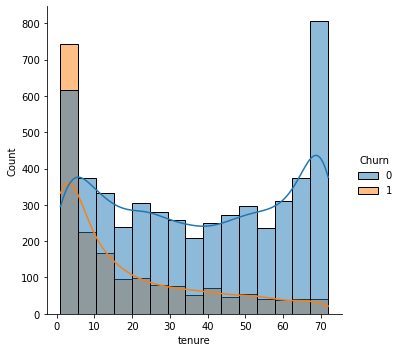

In [37]:
#Distplaot for Tenure
sns.displot(data = Main_df,x = "tenure",hue='Churn',kde = True)
plt.show()

- Tenure with low (near 0) & high(around 70) are more
- Churn rate is decreases as Tenure increses


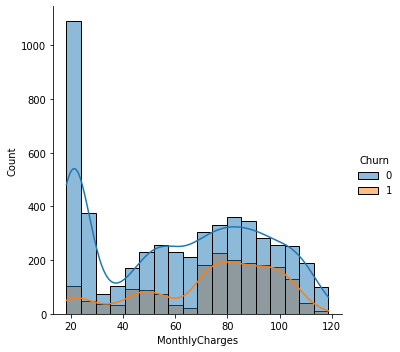

In [38]:
#Distplaot for Tenure
sns.displot(data = Main_df,x = "MonthlyCharges",hue='Churn',kde = True)
plt.show()

- Churn rate is low with lower Monthly charges

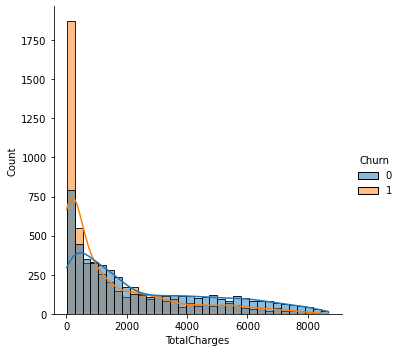

In [110]:
#Distplaot for Tenure
sns.displot(data = Main_df,x = "TotalCharges",hue='Churn',kde = True)
plt.show()

- Churn is less as the Total Charges go high

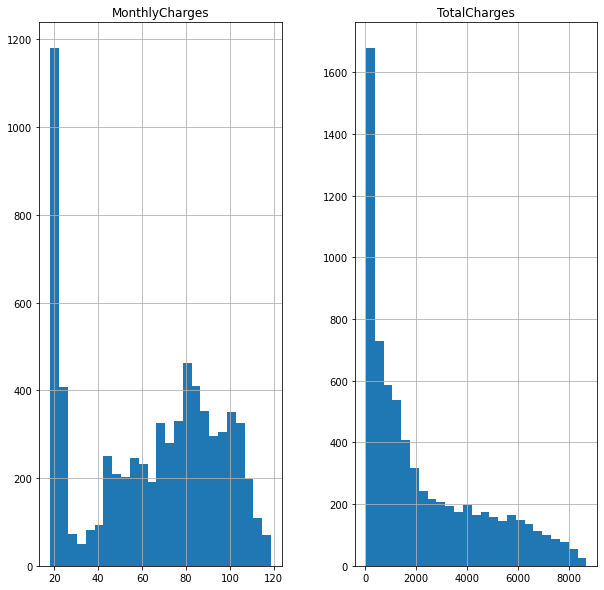

In [39]:
columns = Main_df.iloc[:,1:3].columns# Excluding categorical columns
Main_df[columns].hist(stacked=False, bins=25, figsize=(10,10)); 

- Customers with low monthly & Total charges are high in number
- Customers with high total charges are less & count decending as the bill goes high.
- Customers who pay medium - level monthly charges are significant in number


## `Churn vs 2-class attributes (Yes/No)`

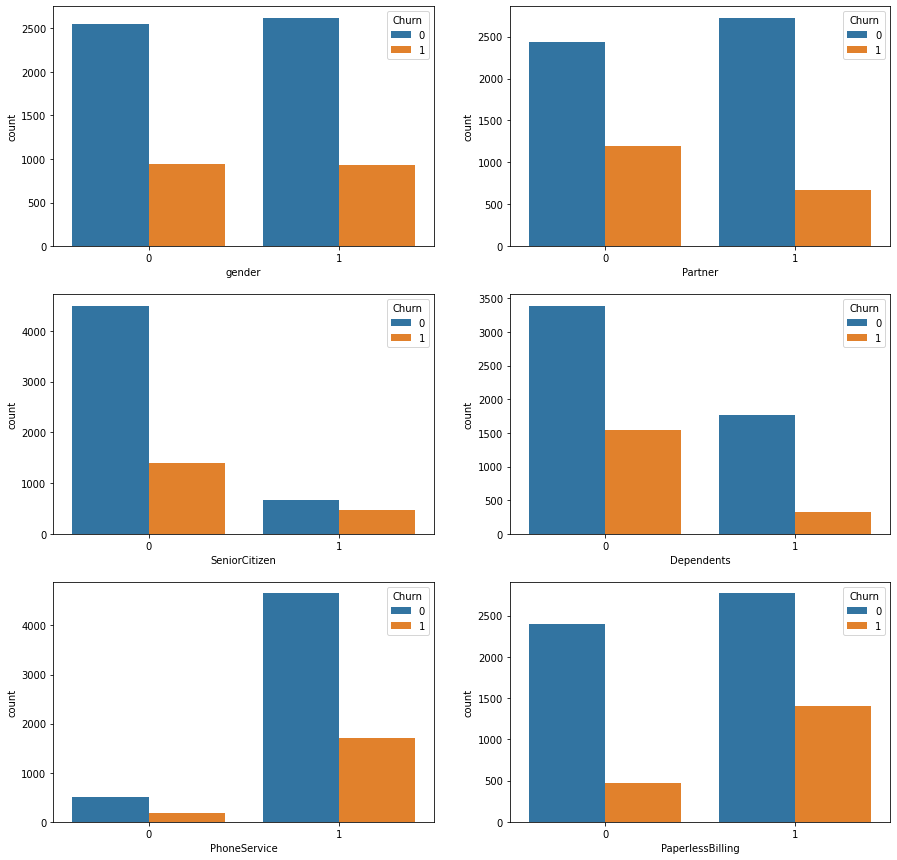

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

sns.countplot(x='gender', hue='Churn', data=Main_df,ax=axes[0,0])
sns.countplot(x='Partner', hue='Churn', data=Main_df,ax=axes[0,1])
sns.countplot(x='SeniorCitizen', hue='Churn', data=Main_df,ax=axes[1,0])
sns.countplot(x='Dependents', hue='Churn', data=Main_df,ax=axes[1,1])
sns.countplot(x='PhoneService', hue='Churn', data=Main_df,ax=axes[2,0])
sns.countplot(x='PaperlessBilling', hue='Churn', data=Main_df,ax=axes[2,1])
plt.show()

- Gender seems to have no influence on Churn.
- Customers with partner are less likely to leave compared to without partner.
- We have few Senior citizens, and churn is high in % with senior citizens.
- Churn is low with customers who has dependents
- Very few without Phone service
- Customers who opted for PaperlessBilling has high churn rate. 

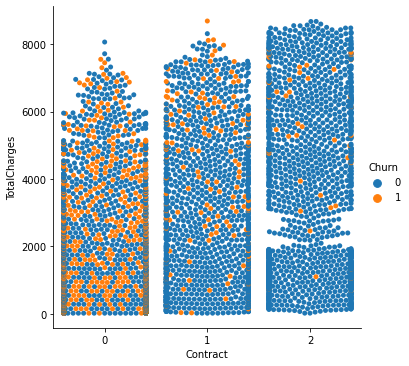

In [250]:
sns.catplot(x='Contract', y='TotalCharges', hue='Churn', data = Main_df, kind='swarm')
plt.show()

- Customers with month-to-month contract are more likely to leave(churn)
- Customers with high contract(2 years) are the ones who pay more & stick with the service.


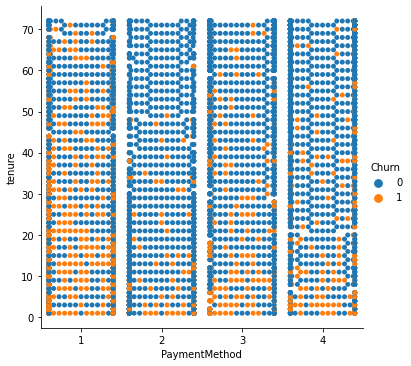

In [252]:
sns.catplot(x='PaymentMethod', y='tenure', hue='Churn', data = Main_df, kind='swarm')
plt.show()

- Customers with low tenure are more likely to leave
- Customers with Electronic Check as payment method are more likely to leave regardless the Tenure
- Customers with Mailed Check as payment method are having less Churn rate compared any other method.

### ` Churn vs Continous attributes (Tenure, Monthly/Total Charges)`

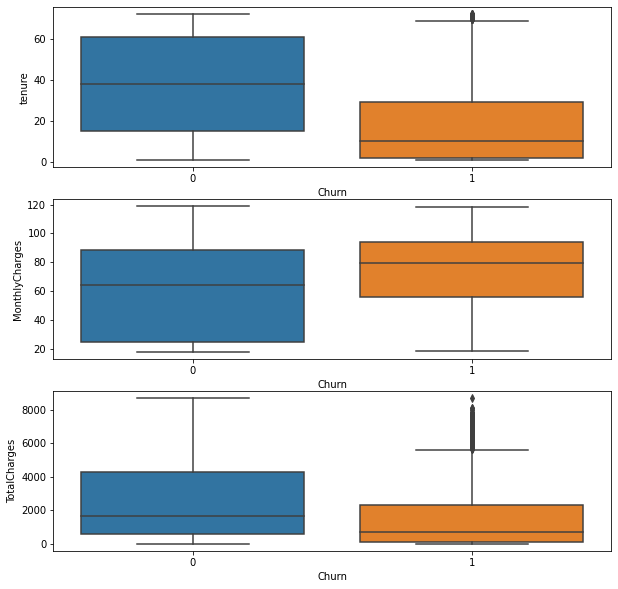

In [267]:
fig, axes = plt.subplots(3, figsize=(10,10))
sns.boxplot(y = 'tenure', x = 'Churn', data=Main_df,ax=axes[0])
sns.boxplot(y = 'MonthlyCharges', x = 'Churn', data=Main_df,ax=axes[1])
sns.boxplot(y = 'TotalCharges', x = 'Churn', data=Main_df,ax=axes[2])
plt.show()

- Churn  is well dispersed w.r.t Charges & Tenure
- Churn 1 has significant ouliers with Total charges & tenure too(few)
- Tenure case- Churn 0 & 1 has proper difference as the both medians are away from the boxes.

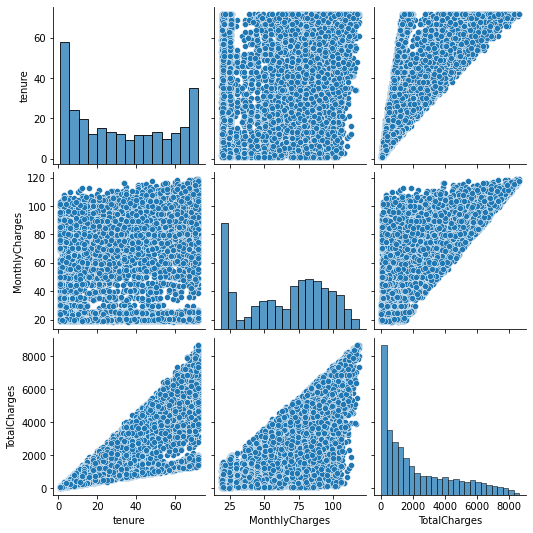

In [302]:
sns.pairplot(Main_df.iloc[:,:3])
plt.show()

- Tenure vs Monthly Charges has no pattern at all.
- Total charges vs monthly & tenure, has slight +ve relationship. we also see the datapoints ranging between min & max regardless Total charges

## ` Churn vs Additional features `

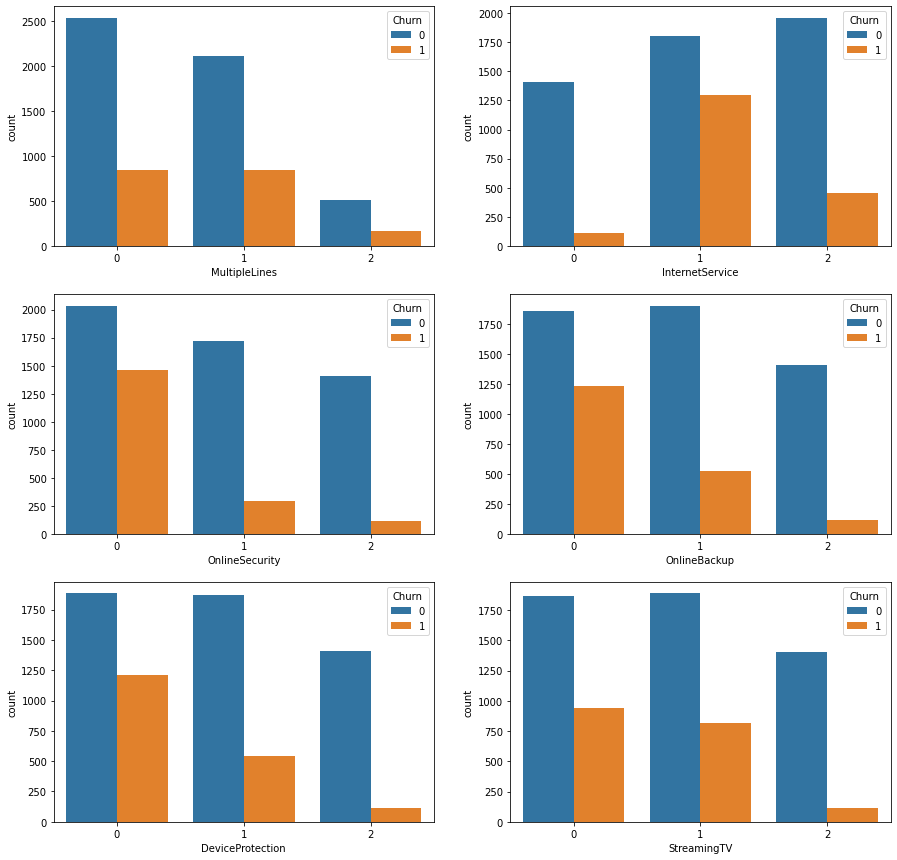

In [307]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
sns.countplot(x='MultipleLines', hue='Churn', data=Main_df,ax=axes[0,0])
sns.countplot(x='InternetService', hue='Churn', data=Main_df,ax=axes[0,1])
sns.countplot(x='OnlineSecurity', hue='Churn', data=Main_df,ax=axes[1,0])
sns.countplot(x='OnlineBackup', hue='Churn', data=Main_df,ax=axes[1,1])
sns.countplot(x='DeviceProtection', hue='Churn', data=Main_df,ax=axes[2,0])
sns.countplot(x='StreamingTV', hue='Churn', data=Main_df,ax=axes[2,1])
plt.show()

- Customers without seeking help from Tech support are leaving more.
- Siginificant change between customers who use support & who don't when it comes to churn rate
- Customers who use Internet service is leaving more (Fiber connection is playing key role in high churn here)
- Customers who doesn't use additional features such as OnlineSecurity, Online Backup,Device protection, are leaving more
- Churn is high with people with/without streaming services enabled
- In all cases, churn is low with customers who don't have Internet Service at all

## `4. Data pre-processing:`

###### • Segregate predictors vs target attributes
###### • Check for target balancing and fix it if found imbalanced.
###### • Perform train-test split.
###### • Check if the train and test data have similar statistical characteristics when compared with original data.

In [42]:
#target variable
Main_df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

- As we've seen, 27% only Churn rate 1; it is imbalanced
- Our model may be slightly biased towards Churn-0
- To avoid this, lets balance our target variable distribution

In [43]:
Churn1 = Main_df[Main_df['Churn'] == 1]
print("Before Upsampling the Class1 shape: ",Churn1.shape)

#Upsampling
Churn1_upsample = resample(Churn1,n_samples=5163)
print("After Upsampling the Class1 shape: ",Churn1_upsample.shape)

#Merging into main dataset
Main_df = pd.concat([Main_df[Main_df['Churn']== 0],Churn1_upsample])
Main_df['Churn'].value_counts()

Before Upsampling the Class1 shape:  (1869, 20)
After Upsampling the Class1 shape:  (5163, 20)


0    5163
1    5163
Name: Churn, dtype: int64

In [45]:
#Independent
X = Main_df.drop(['Churn'], axis=1)
#Target
y = Main_df['Churn']

### Ensemble models (Trees) aren't sensitive to feature scaling. But still it is useful to compare the features & doesn't affect the model performance, so Lets use z-score.

In [46]:
#Since we have numeric values & we are not sure of the measurements. So we need to normalize.
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
XScaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,10326.0,-5.504883e-17,1.000048,-1.106544,-0.940041,-0.274030,0.891490,1.848882
MonthlyCharges,10326.0,4.183711e-16,1.000048,-1.723973,-0.774922,0.231490,0.792926,1.769788
TotalCharges,10326.0,-6.605859e-17,1.000048,-0.921980,-0.808192,-0.407554,0.546913,3.067028
gender,10326.0,1.283326e-16,1.000048,-1.013259,-1.013259,0.986915,0.986915,0.986915
SeniorCitizen,10326.0,-3.853418e-17,1.000048,-0.483874,-0.483874,-0.483874,-0.483874,2.066653
Partner,10326.0,3.853418e-17,1.000048,-0.883198,-0.883198,-0.883198,1.132250,1.132250
Dependents,10326.0,-1.100977e-17,1.000048,-0.593829,-0.593829,-0.593829,1.683986,1.683986
PhoneService,10326.0,1.273004e-16,1.000048,-3.182319,0.314236,0.314236,0.314236,0.314236
MultipleLines,10326.0,-5.917749e-17,1.000048,-0.998935,-0.998935,0.050618,1.100170,1.100170
InternetService,10326.0,3.302930e-17,1.000048,-1.273089,-1.273089,0.205642,0.205642,1.684373


- Std deviation is close to 1 unit after normalization for all features.

In [47]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
#Train Data
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7228.0,-0.002979,1.001577,-1.106544,-0.940041,-0.315656,0.891490,1.848882
MonthlyCharges,7228.0,-0.000291,1.003750,-1.723973,-0.783613,0.231490,0.803355,1.766312
TotalCharges,7228.0,-0.004212,1.001113,-0.921980,-0.810540,-0.409222,0.535371,3.067028
gender,7228.0,-0.001273,1.000085,-1.013259,-1.013259,0.986915,0.986915,0.986915
SeniorCitizen,7228.0,0.004495,1.003610,-0.483874,-0.483874,-0.483874,-0.483874,2.066653
Partner,7228.0,0.002395,1.000364,-0.883198,-0.883198,-0.883198,1.132250,1.132250
Dependents,7228.0,-0.005782,0.996896,-0.593829,-0.593829,-0.593829,1.683986,1.683986
PhoneService,7228.0,-0.005523,1.007944,-3.182319,0.314236,0.314236,0.314236,0.314236
MultipleLines,7228.0,-0.002383,0.999075,-0.998935,-0.998935,0.050618,1.100170,1.100170
InternetService,7228.0,0.003922,0.999158,-1.273089,-1.273089,0.205642,0.205642,1.684373


In [49]:
#Test Data
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3098.0,0.006950,0.996600,-1.106544,-0.940041,-0.232404,0.849864,1.848882
MonthlyCharges,3098.0,0.000679,0.991520,-1.713544,-0.748414,0.234967,0.776847,1.769788
TotalCharges,3098.0,0.009827,0.997653,-0.921957,-0.802110,-0.401006,0.572011,3.067028
gender,3098.0,0.002969,1.000118,-1.013259,-1.013259,0.986915,0.986915,0.986915
SeniorCitizen,3098.0,-0.010487,0.991771,-0.483874,-0.483874,-0.483874,-0.483874,2.066653
Partner,3098.0,-0.005587,0.999450,-0.883198,-0.883198,-0.883198,1.132250,1.132250
Dependents,3098.0,0.013490,1.007399,-0.593829,-0.593829,-0.593829,1.683986,1.683986
PhoneService,3098.0,0.012887,0.981419,-3.182319,0.314236,0.314236,0.314236,0.314236
MultipleLines,3098.0,0.005559,1.002455,-0.998935,-0.998935,0.050618,1.100170,1.100170
InternetService,3098.0,-0.009151,1.002225,-1.273089,-1.273089,0.205642,0.205642,1.684373


In [50]:
#Main Data before Scaling
Main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,10326.0,27.583188,24.024773,1.00,5.00,21.000,49.000,72.00
MonthlyCharges,10326.0,67.841052,28.766950,18.25,45.55,74.500,90.650,118.75
TotalCharges,10326.0,2021.773204,2172.575162,18.80,266.00,1136.375,3209.925,8684.80
gender,10326.0,0.506585,0.499981,0.00,0.00,1.000,1.000,1.00
SeniorCitizen,10326.0,0.189715,0.392095,0.00,0.00,0.000,0.000,1.00
Partner,10326.0,0.438214,0.496192,0.00,0.00,0.000,1.000,1.00
Dependents,10326.0,0.260701,0.439038,0.00,0.00,0.000,1.000,1.00
PhoneService,10326.0,0.910130,0.286010,0.00,1.00,1.000,1.000,1.00
MultipleLines,10326.0,0.951772,0.952834,0.00,0.00,1.000,2.000,2.00
InternetService,10326.0,0.860934,0.676288,0.00,0.00,1.000,1.000,2.00


- Compared to original dataset, the std, mean values of Test & Train data is different. That is because of Standardization
- Std is near 1, mean is near 0 for all numerical attributes

## `5. Model training, testing and tuning:`

• Train and test all ensemble models taught in the learning module.

• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.

• Display the classification accuracies for train and test data.

• Apply all the possible tuning techniques to train the best model for the given data.

• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

• Display and compare all the models designed with their train and test accuracies.

• Select the final best trained model along with your detailed comments for selecting this model.

• Pickle the selected model for future use.

### `Decision Trees`

In [52]:
# invoking the decision tree classifier function. 

#Using 'entropy' & 'gini' method of finding the split columns.
dTree_entropy = DecisionTreeClassifier(criterion='entropy')
dTree_gini = DecisionTreeClassifier(criterion='gini')
dTree_entropy.fit(X_train, y_train)
dTree_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
#Scoring
print(dTree_entropy.score(X_train, y_train))
print(dTree_entropy.score(X_test, y_test))

0.9984781405644715
0.855067785668173


In [54]:
print(dTree_gini.score(X_train, y_train))
print(dTree_gini.score(X_test, y_test))

0.9984781405644715
0.8612007746933505


- Accuracy is near 100%, so it is over-fitting
- We can build better Tree Model by restricting depth of tree nodes. This is called **`Pruning`** the decision trees

In [59]:
dTree_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=5, min_samples_leaf=10)
dTree_pruned.fit(X_train, y_train)
print(dTree_pruned.score(X_train, y_train))
print(dTree_pruned.score(X_test, y_test))

0.771306032097399
0.7420916720464816


- The overfitting has been reduced.
- Lets make sure how to get the optimal values for depth by automating the whole process

    Max_Depth  Train_Acc  Test_Acc
0           1   0.724682  0.729503
1           2   0.735058  0.731440
2           3   0.745434  0.742414
3           4   0.767847  0.758231
4           5   0.774211  0.742737
5           6   0.791644  0.755649
6           7   0.807001  0.771788
7           8   0.832319  0.777598
8           9   0.850858  0.782763
9          10   0.872164  0.803744
10         11   0.895683  0.800839
11         12   0.918650  0.814396
12         13   0.936635  0.831181
13         14   0.954344  0.846998


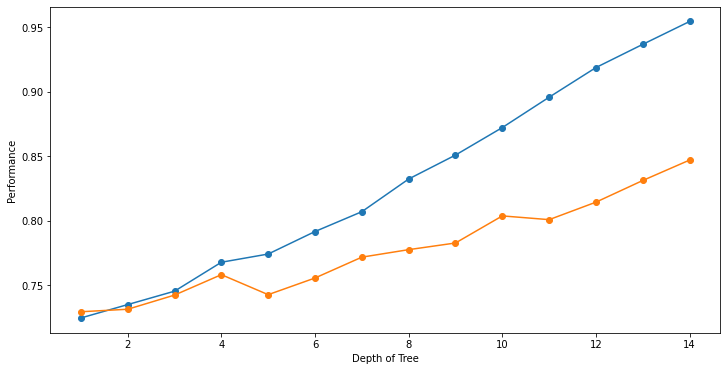

In [60]:
train_accuracy = []
test_accuracy = []
for depth in range(1,15):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=100,criterion = "gini")
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    test_accuracy.append(dt_model.score(X_test,y_test))

    
#Results
df = pd.DataFrame({'Max_Depth': range(1,15),'Train_Acc':train_accuracy,'Test_Acc':test_accuracy})

print(df)

plt.figure(figsize=(12,6))
plt.plot(df['Max_Depth'],df['Train_Acc'],marker='o')
plt.plot(df['Max_Depth'],df['Test_Acc'],marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.show()

- Blue line: **Training Accuracy**
- Orange line: **Testing Accuracy**
- Accuracy will just go high as the depth of the tree increases.

In [58]:
#GridSearch for choosing optimal values for our DT model
parameters = {'min_samples_split':np.arange(1, 15), 'max_depth': np.arange(1,15), 'criterion':['gini', 'entropy']}
dtc = DecisionTreeClassifier()
grid = GridSearchCV(dtc, parameters,scoring='accuracy', cv=8)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 2}


- Lets build the tree from the above chosen values

In [61]:
dTree_best = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=14, min_samples_split=2)
dTree_best.fit(X_train, y_train)
print(dTree_best.score(X_train, y_train))
print(dTree_best.score(X_test, y_test))

0.954344216934145
0.8469980632666236


- Accuracy is improved & balanced between Training & Testing data sets
- Lets represent the same in Tree image using plot_tree

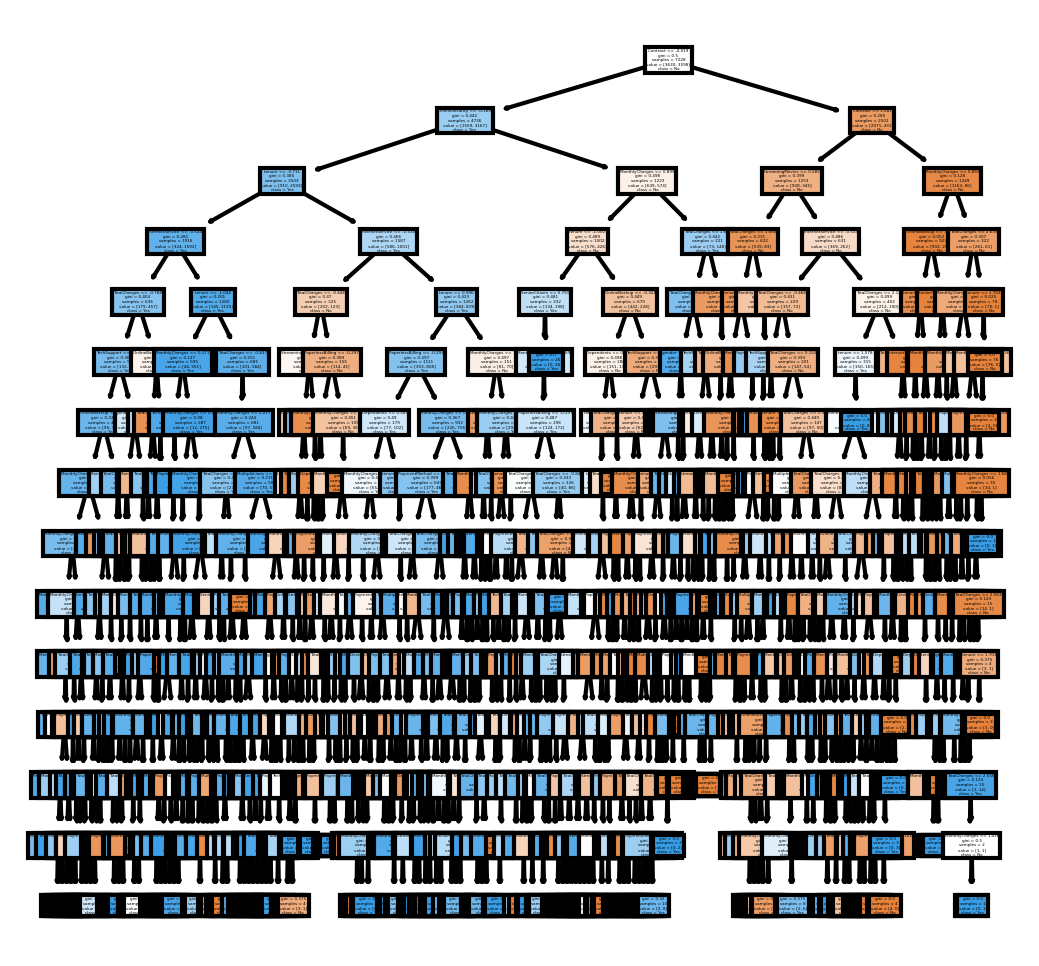

In [63]:
# using plot_tree method from sklearn.tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree_best, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

- Importance of features in the tree building.
- The importance of a feature is computed as the total reduction of the criterion brought by that feature. 
- It is also known as the **Gini importance**

In [64]:
feat_importance = dTree_best.tree_.compute_feature_importances(normalize=True)
feature_cols = XScaled.columns

feat_imp_dict = dict(zip(feature_cols, dTree_best.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
Contract,0.277430
TotalCharges,0.174324
MonthlyCharges,0.153361
tenure,0.093933
OnlineSecurity,0.047379
PaymentMethod,0.040351
InternetService,0.026935
StreamingMovies,0.025073
OnlineBackup,0.022448
gender,0.020148


- Contarct plays huge role in Chrun rate
- Monthly/Total charges, Tenure plays siginificant role too

0.8469980632666236


<AxesSubplot:>

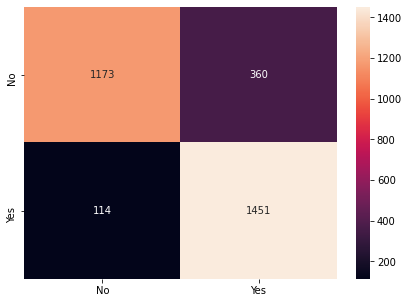

In [66]:
#confusion matrix 
print(dTree_best.score(X_test , y_test))
y_predict = dTree_best.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

##### Actual 0 - TN: 1173; FP: 360 (Total: 1533)
##### Actual 1 - FN: 114; TP: 1451 (Total: 1565)

- False positives are more compared to False Negatives
- True postives are predicted better

In [68]:
#Classification Report:
clf_report = classification_report(y_test,y_predict)
print(clf_report)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1533
           1       0.80      0.93      0.86      1565

    accuracy                           0.85      3098
   macro avg       0.86      0.85      0.85      3098
weighted avg       0.86      0.85      0.85      3098



###### Precision = TP/(TP + FP) (Correct prediction rate)
- class 0 is predicted slightly more
- overall 86% is good score

######  Recall = TP/(TP+FN)
- class 1 is predicted better
- overall 85% is good score


######  F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- 85% is much better F1-score


In [70]:
#Store the accuracy results for each model in a dataframe for final comparison
acc_DT = accuracy_score(y_test, y_predict)
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.846998


### `Random Forest Model`

In [76]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [77]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
acc_RF

0.881213686249193

<AxesSubplot:>

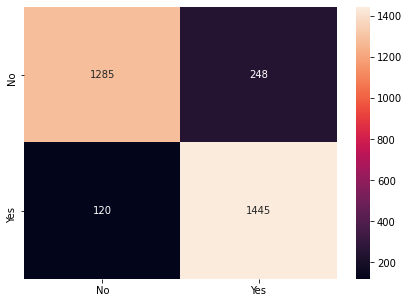

In [78]:
cm=confusion_matrix(y_test, pred_RF,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

- FP rate is too low compared to Decision Tree model
- FN is also slightly more than Decision Tree model

In [79]:
#Classification Report:
clf_report = classification_report(y_test,pred_RF)
print(clf_report)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1533
           1       0.85      0.92      0.89      1565

    accuracy                           0.88      3098
   macro avg       0.88      0.88      0.88      3098
weighted avg       0.88      0.88      0.88      3098



###### Precision = TP/(TP + FP) (Correct prediction rate)
- class 0 is predicted slightly better
- overall 88% is good score

######  Recall = TP/(TP+FN)
- class 1 is predicted better
- overall 88% is good score


######  F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- 88% is much better F1-score


In [81]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.846998
0,Random Forest,0.881214


### `AdaBoost Classifier`

In [84]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=100)
abcl = abcl.fit(X_train, y_train)

0.7569399612653325


<AxesSubplot:>

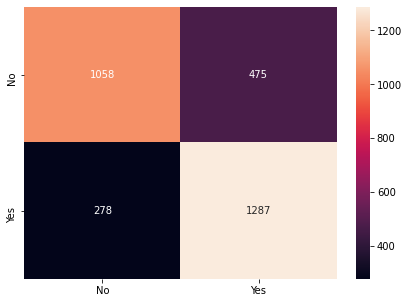

In [85]:
y_predict = abcl.predict(X_test)
acc_AB=abcl.score(X_test , y_test)
print(acc_AB)

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

- Acc score is too low compared to previous models
- High FP & FN rate

In [86]:
#Classification Report:
clf_report = classification_report(y_test,y_predict)
print(clf_report)

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1533
           1       0.73      0.82      0.77      1565

    accuracy                           0.76      3098
   macro avg       0.76      0.76      0.76      3098
weighted avg       0.76      0.76      0.76      3098



###### Precision = TP/(TP + FP) (Correct prediction rate)
- class 0 is predicted slightly more
- overall 76% isn't good score

######  Recall = TP/(TP+FN)
- class 1 is predicted better & class 0 is way too low
- overall 76% isn't good score


######  F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- 76% is not great F1-score


In [88]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.846998
0,Random Forest,0.881214
0,Adaboost,0.756940


### `Bagging Classifier`

In [89]:
bgcl = BaggingClassifier(base_estimator=dTree_best, n_estimators=50,random_state=100)

bgcl = bgcl.fit(X_train, y_train)

0.868624919302776


<AxesSubplot:>

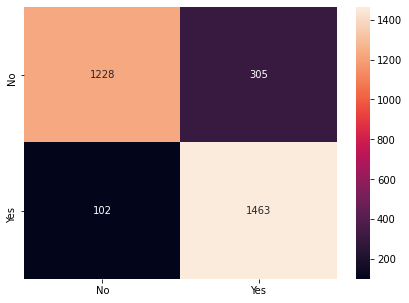

In [90]:
y_predict = bgcl.predict(X_test)

acc_BG=bgcl.score(X_test , y_test)
print(acc_BG)

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

- This model better than Adaboosting
- Still has high FP rate
- FN rate is low copared to previous models

In [91]:
#Classification Report:
clf_report = classification_report(y_test,y_predict)
print(clf_report)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1533
           1       0.83      0.93      0.88      1565

    accuracy                           0.87      3098
   macro avg       0.88      0.87      0.87      3098
weighted avg       0.87      0.87      0.87      3098



###### Precision = TP/(TP + FP) (Correct prediction rate)
- class 0 is predicted too good
- overall 87% is good score

######  Recall = TP/(TP+FN)
- class 1 is predicted too good
- overall 87% is good score


######  F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- 87% is much better F1-score


In [92]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.846998
0,Random Forest,0.881214
0,Adaboost,0.756940
0,Bagging,0.868625


### `Gradient Boosting`

In [93]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=100)
gbcl = gbcl.fit(X_train, y_train)


0.7682375726275016


<AxesSubplot:>

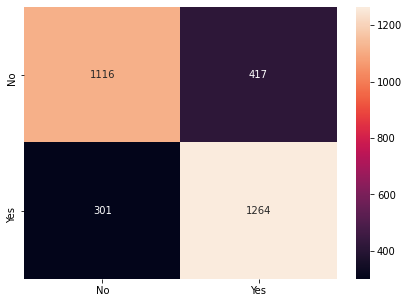

In [94]:
y_predict = gbcl.predict(X_test)
acc_GB=gbcl.score(X_test, y_test)
print(acc_GB)
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

- FP & FN rate is too high
- Not good model compared to Bagging or RandomForest models

In [95]:
#Classification Report:
clf_report = classification_report(y_test,y_predict)
print(clf_report)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1533
           1       0.75      0.81      0.78      1565

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



###### Precision = TP/(TP + FP) (Correct prediction rate)
- class 0 is predicted slightly more
- overall 77% is just fine

######  Recall = TP/(TP+FN)
- class 1 is predicted better
- overall 77% is just fine

######  F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- 77% is just fine F1-score


In [96]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.846998
0,Random Forest,0.881214
0,Adaboost,0.756940
0,Bagging,0.868625
0,Gradient Boost,0.768238


### `XG Boost Classifier`

In [106]:
xgb = XGBClassifier(n_estimators = 50,random_state=100,eval_metric='error')
xgb = xgb.fit(X_train, y_train)

0.8240800516462233


<AxesSubplot:>

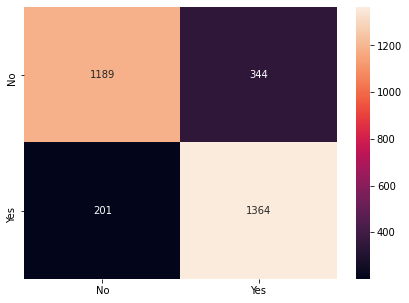

In [107]:
y_predict = xgb.predict(X_test)
acc_xgb=xgb.score(X_test, y_test)
print(acc_xgb)
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

- FP is too high; FN is almost same as previous models

In [108]:
#Classification Report:
clf_report = classification_report(y_test,y_predict)
print(clf_report)

              precision    recall  f1-score   support

           0       0.86      0.78      0.81      1533
           1       0.80      0.87      0.83      1565

    accuracy                           0.82      3098
   macro avg       0.83      0.82      0.82      3098
weighted avg       0.83      0.82      0.82      3098



###### Precision = TP/(TP + FP) (Correct prediction rate)
- class 0 is predicted slightly more
- overall 83% is good

######  Recall = TP/(TP+FN)
- class 1 is predicted better
- overall 82% is good

######  F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- 82% is good F1-score

In [109]:
tempResultsDf = pd.DataFrame({'Method':['XG Boost'], 'accuracy': [acc_xgb]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.846998
0,Random Forest,0.881214
0,Adaboost,0.756940
0,Bagging,0.868625
0,Gradient Boost,0.768238
0,XG Boost,0.824080


- We have built 6 ML models
- Random Forest is best suitable for this problem
- Bagging, XG Boosting is good enough modelstoo

## `6. Conclusion and improvisation:`
    
###### • Write your conclusion on the results.
###### • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.

### `Conclusions`

- Churn distribution is imbalanced in dataset. 
- Churn rate has nothing to do with Gender; Male, Female count is well balanced in dataset
- Tenure has inverse proportional to Churn rate. So customers with more tenure are less likely to leave.
- Tech support & Churn has negative relationship. Customers who are leaving are less likely to reach Support.
- Dataset has few Senior Citizens and Churn rate is too high within Senior Citizens.
- Customers with paperless billing has good churn rate
- People with payment type as Electronic Check is leaving more (regardless tenure period); a serious concern
- Customers with Internet Service enabled have good churn rate
- Customers who opted for additional services like Device protection, Online Security, Backup, Streaming services are less likely to leave.
- Total charges has outliers; mean is way beyond the Max value. i.e very few customers paying high charges
- Churn is less as the Total charges go higher
- Churn is less with medium Monthly charges,i.e low/high monthly charges see more churn


### `Suggestions`

- Data should've been much more elobarative in order to identify the Churning problem
- Customer Age group, Income group, Occupation, marital status would have been helpful
- Tech suport data should've been given; Type of support problem, status, satisfied/unstaisfied rating from user
- Customers areas - Rural or Urban (along with types of services they avail)
- Since month-to-month users has high churn rate. Need details of what plans are avaiable on monthly basis..etc
- Type of customer - Mobile or Landline
- Type of service they use - Message/Calls/Internet Service
- Type of Mobile handset & type of Internet service using 3G/4G..etc
- Calls data should've been helpful like incoming calls/outgoing calls duration, no.of dropped calls, time of calls-Day/Eve/Night to attarct users with better plans
- International romaning plans availed or not


### `About Given Dataset`

- Good quantity (7032 non-null rows) and has very few null rows (11)
- No negative values or special characters present
- Dataset is well captured
- Target variable is highly imbalanced
- Quality & Quantity is good enough to use for ML models
- Data is very trustworthy as it is genarated internally & would take lot of time as well
- Data still could've been better with many important attributes as discussed above

In [111]:
###  End of the Notebook